# 6.2 - User Evaluation - CourseRec 1.0 Usefulness Survey

In [202]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## 1. Load from CSV

In [121]:
courserec_user_survey_DF = pd.read_csv('../../data/raw/user_evaluation_survey/courserec_user_survey.csv'); courserec_user_survey_DF.head()

,response,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,1,I've completed this step.,25%,1-3,NaN,3,"Yes, I'm willing to trade some accuracy for le...",Neutral,Neutral,Neutral,3,Neutral,NaN
1,2,I've completed this step.,25%,1-3,NaN,4,"Yes, I'm willing to trade some accuracy for le...",Somewhat Useful,Somewhat Useful,Somewhat Useful,4,Somewhat Satisfied,NaN
2,3,I've completed this step.,75%,1-3,NaN,5,"No, I want to make sure my academic preference...",Very Useful,Very Useful,Very Useful,5,Very Satisfied,NaN
3,4,I've completed this step.,50%,1-3,Something I need to take for my requirements,5,"No, I want to make sure my academic preference...",Neutral,Neutral,Very Useful,4,Neutral,NaN
4,5,I've completed this step.,75%,1-3,Align with course specialization,4,"Yes, I'm willing to trade some accuracy for le...",Somewhat Useful,Somewhat Useful,Somewhat Useful,4,Somewhat Satisfied,NaN


## 2. Transform & Aggregate Survey Responses

In [431]:
#Question Key
questions = {
    'Q1':'Please open and use the prototype in another tab (chrome/safari preferably).',
    'Q2':'What % of recommended classes are you taking or have taken?',
    'Q3':'How many of the recommended classes would you like to take?',
    'Q4':'What about the recommended classes made them interesting to you?',
    'Q5':'How much do you agree with the statement: \n "It is important to me to be explicitly asked about my preferences."',
    'Q6':'Would you prefer for the system to guess? (Assume this was possible somehow.)',
    'Q7':'How useful was it to have tags that showed which interests lead to which recommendations?',
    'Q8':'How useful was it to see information about your constraints with your recommendations?',
    'Q9':'Overall, how useful is it to have explanations for course recommendations?',
    'Q10':'How much do you agree with the statement: \n "Explanations of recommendations increase my trust in the recommendations."',
    'Q11':'Overall, how satisfied were you with the course recommender?',
    'Q12':'Feel free to leave other feedback or suggestions for improvement.  Thank you!'  
}

qualitative = ['Q4', 'Q12']

likert = {'Q5':'agree', 'Q7':'useful', 'Q8':'useful', 'Q9':'useful', 'Q11':'satisfaction'}

likert_useful =  {'Very Useful': 5,
                  'Somewhat Useful': 4,
                  'Neutral': 3,
                  'Not Very Useful':2,
                  'Not at all Useful':1}

likert_satisfied = {'Very Satisfied': 5,
                  'Somewhat Satisfied': 4,
                  'Neutral': 3,
                  'Not Very Satisfied':2,
                  'Not at all Satisfied':1}

likert_agree = {'Strongly Agree':5,
                'Agree':4,
                'Neutral':3,
                'Disagree':2,
                'Strongly Disagree':1}
                

def plot_results(df, q_name, q_col_label, label_pos='center right'):
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    
    df.plot.bar(ax=ax, rot=0, ylim=(0,100));
    ax.set_title('Results for {q_col_label}: "{q_name}"'.format(q_name=q_name, q_col_label=q_col_label), fontsize=15)
    ax = plt.table(cellText=df.values, colWidths = [0.25]*len(df.columns),
                              rowLabels=df.index,
                              colLabels=df.columns,
                              cellLoc = 'center', rowLoc = 'center',
                              loc=label_pos,
                              bbox= [1.3, 0.5, 0.3, 0.3])
    
    
    plt.tight_layout()

def print_aggregate_results(q_name, q_col_label, likert=likert, likert_satisfied=likert_satisfied, likert_useful=likert_useful, likert_agree=likert_agree, label_pos='center right'):
    #calc percentages of total
    temp_count = courserec_user_survey_DF.groupby(q_col_label)['response'].count().rename("% of Total")
    temp_df = pd.DataFrame(np.round(temp_count / temp_count.sum() * 100, 2))
    
    #sort labels
    if q_col_label == 'Q2':
        key = lambda i: float(i[:-1])
        new_idx = sorted(temp_df.index.tolist(), key = key)
        temp_df = temp_df.reindex(new_idx)
    
    if q_col_label in likert.keys():
        if likert[q_col_label] == 'satisfaction':
            key = likert_satisfied
        elif likert[q_col_label] == 'useful':
            key = likert_useful
        elif likert[q_col_label] == 'agree':
            key = likert_agree
            inverted_key = dict(zip(key.values(), key.keys()))
            temp_df = temp_df.rename(inverted_key)
            
        new_idx = sorted(temp_df.index.tolist(), key = lambda i: float(key[i]))
        temp_df = temp_df.reindex(sorted(key.keys(), key = lambda i: float(key[i])))
        
    if q_col_label == 'Q6':
        simplify = {"Yes, I'm willing to trade some accuracy for less effort required.":'Yes', 'No, I want to make sure my academic preferences are right, even though some effort is required.':'No'}
        temp_df = temp_df.rename(index=simplify)
        
    #plot
    plot_results(temp_df, q_name, q_col_label, label_pos)

### 2.1 Raw Outputs

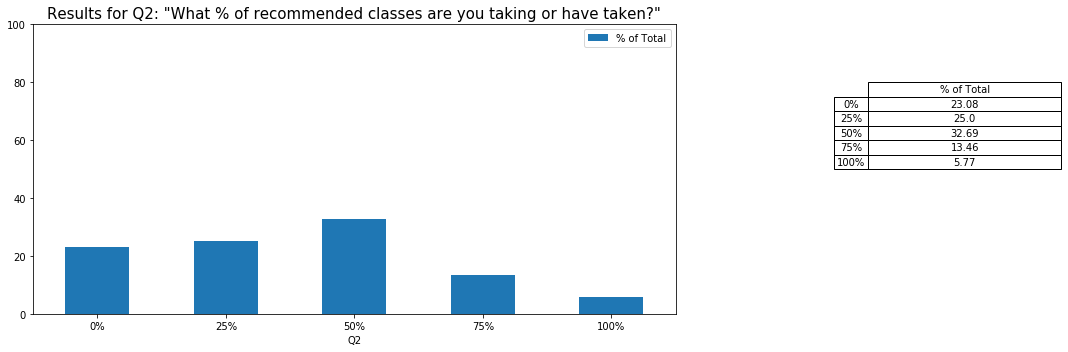

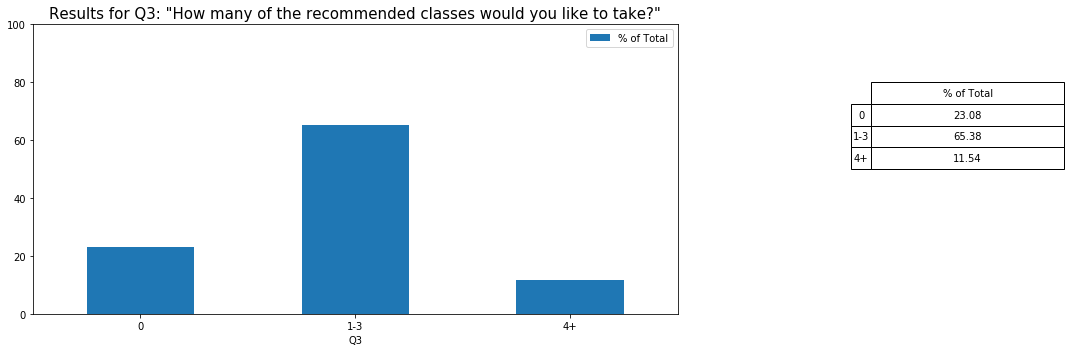

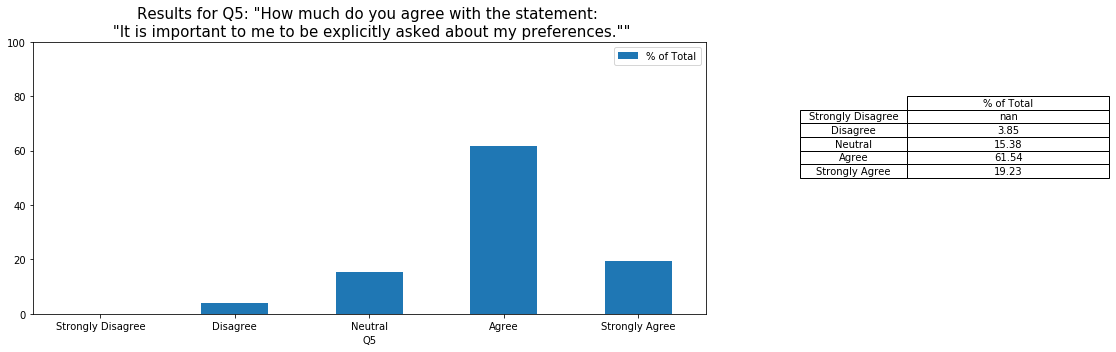

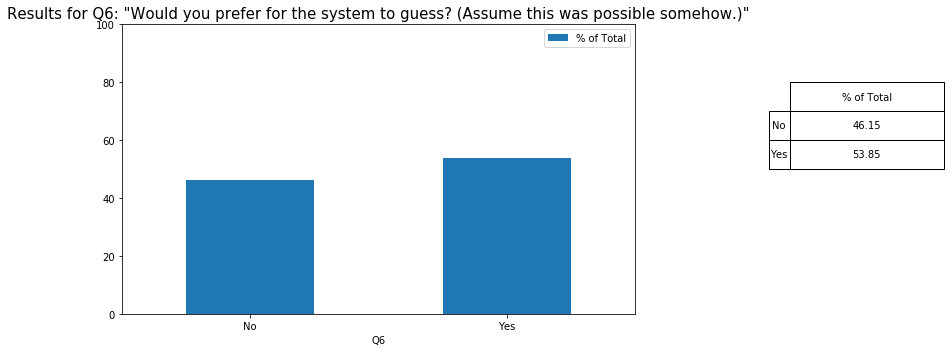

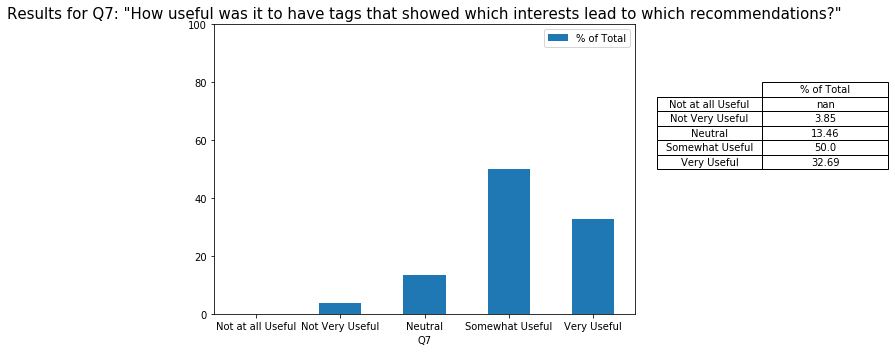

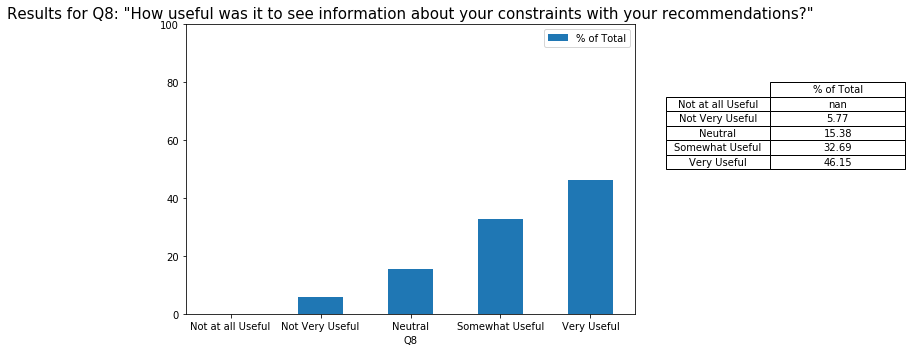

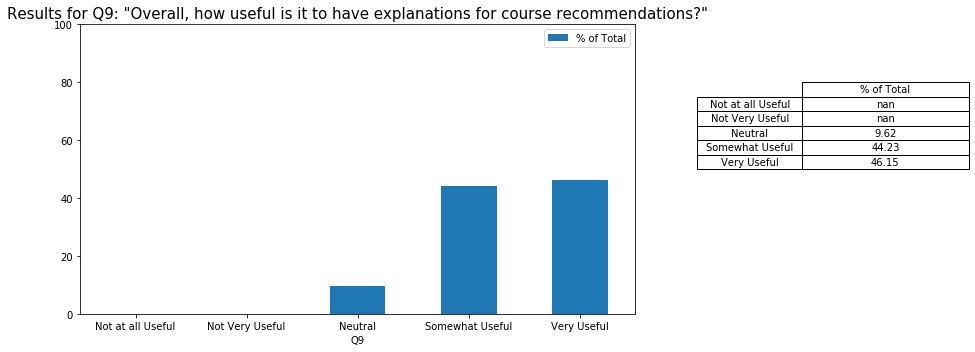

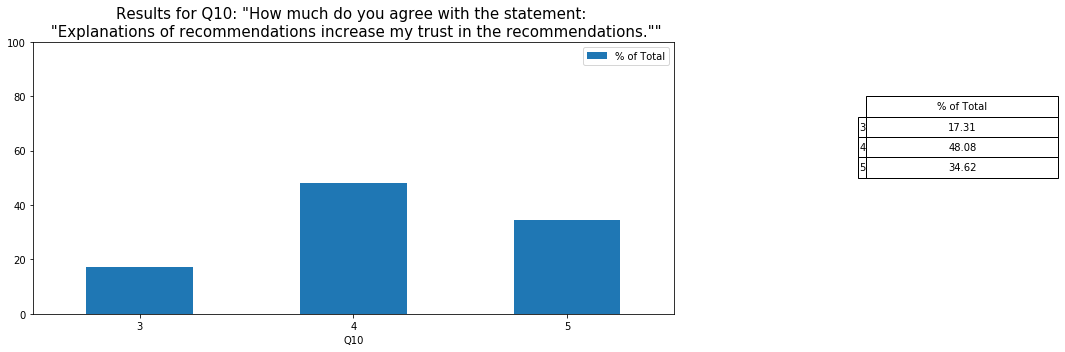

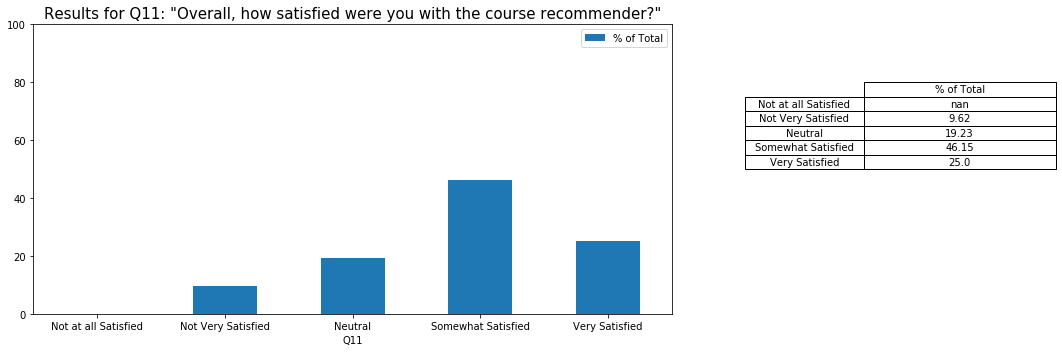

In [432]:
for q_col_label in courserec_user_survey_DF.columns[2:]:
    if q_col_label in qualitative: 
        continue
    q_name = questions[q_col_label]
    print_aggregate_results(q_name, q_col_label)


In [433]:
for q_col_label in courserec_user_survey_DF.columns[2:]:
    if q_col_label in qualitative: 
        q_name = questions[q_col_label]
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        print('\n' + q_name + ': \n')
        for res in courserec_user_survey_DF[q_col_label].tolist():
            if isinstance(res, str): print(res)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

What about the recommended classes made them interesting to you?: 

Something I need to take for my requirements
Align with course specialization
Meet the specifications
they teach topics that in demand for jobs such as software development process 
They were a part of my specialization
Being able to set criteria for what I'm looking for made for a good experience in finding courses.
I did not get any recommendations
Topics at hand
They are on the required list for my specialization ;)
The extra information provided (eg time per week and difficulty)
It didn't recommend any classes to me, none matched the constraints
The topics aligned with my interests
They were a part of my specialization of Computing Systems or peaked my interest because like HCI or EdTech. 
There are only so many on the low range of difficulty & hours, that it might be worth organizing courses by "bottom percentage" o

### 2.2 In Depth Analysis

#### 2.2.1 Sample Size (# respondents, # cols)

In [434]:
courserec_user_survey_DF.shape

(52, 13)

#### 2.2.2 Survey Responses

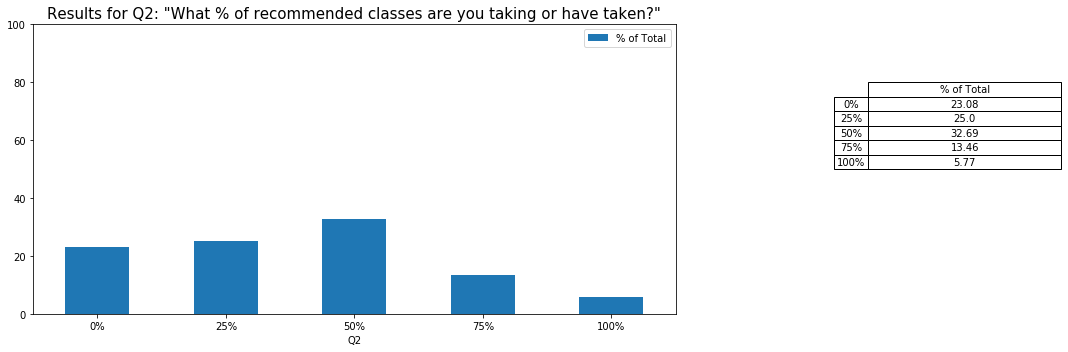

In [435]:
q_col_label = 'Q2'
q_name = questions[q_col_label]
print_aggregate_results(q_name, q_col_label)

*Now we have to keep in mind that there are only 30 classes in OMSCS and students are only required to take 10, therefore, the algo had a high shot at this since it shows the top 15 recommendations and the expected value for number of classes is likely at least a few classes.*

But its still potentially a positive sign that 80% of students saw atleast one recommendation that matched classes they've already taken.



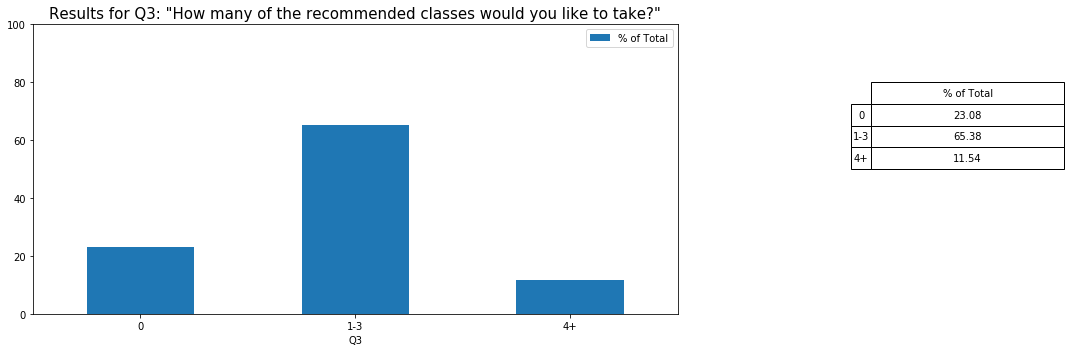

In [436]:
q_col_label = 'Q3'
q_name = questions[q_col_label]
print_aggregate_results(q_name, q_col_label)

As well, 80% of students mentioned they found classes they'd be interested in taking.

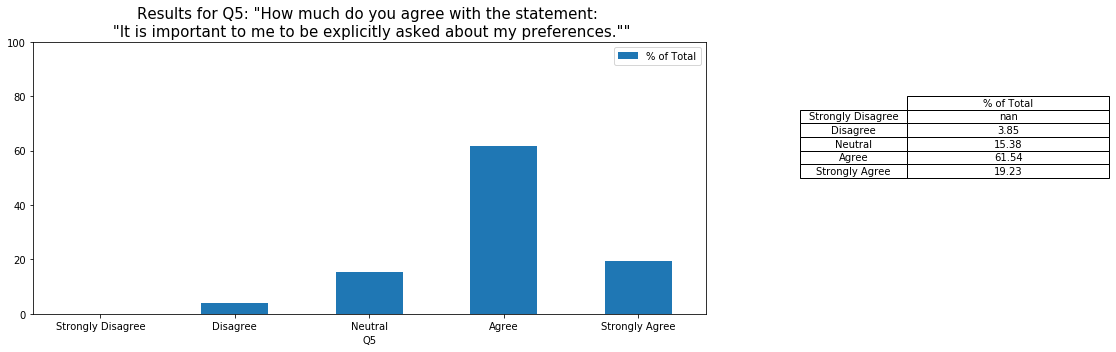

In [437]:
q_col_label = 'Q5'
q_name = questions[q_col_label]
print_aggregate_results(q_name, q_col_label, label_pos='top left')

Again over 80% say they being able to explicitly state preferences is important.

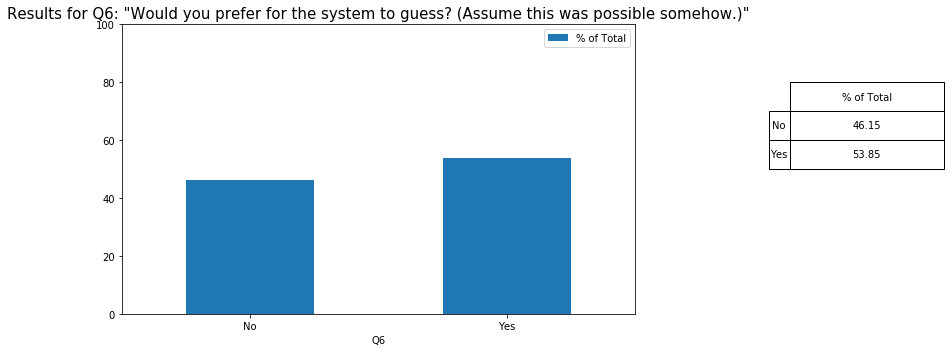

In [439]:
q_col_label = 'Q6'
q_name = questions[q_col_label]
print_aggregate_results(q_name, q_col_label, label_pos='top left')

Interestingly, people are pretty split on having the system guess instead of providing explicit preferences.  It would seem that if the quality of the guesses are almost there, then they wouldn't feel the need to bother with adding them by hand.  Perhaps this points to some sort of sane defaulting, that is changeable.

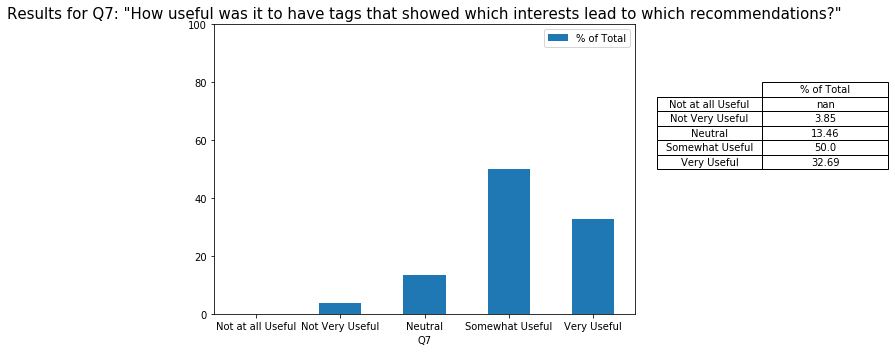

In [438]:
q_col_label = 'Q7'
q_name = questions[q_col_label]
print_aggregate_results(q_name, q_col_label, label_pos='top left')

The tags turned out to be mostly somewhat useful.  I think this is because the tags don't feel like they give that much extra information since many tags showed up for many options.  This would make more sense given there were more interests than the original <10.  Ideally, I wanted to show keywords or link to syllabi but that became outside of the scope of the project.

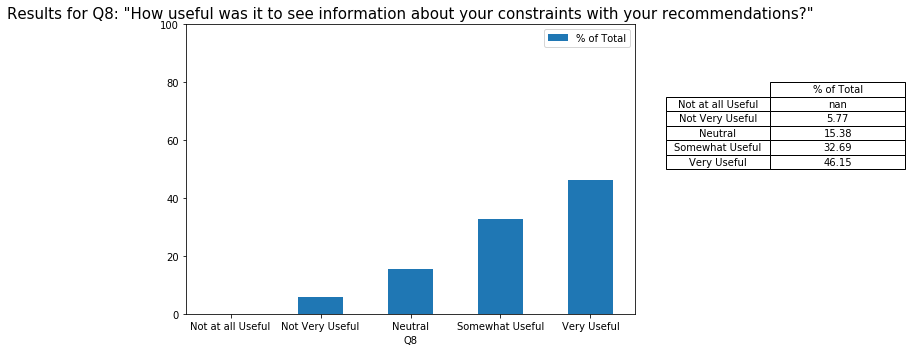

In [440]:
q_col_label = 'Q8'
q_name = questions[q_col_label]
print_aggregate_results(q_name, q_col_label, label_pos='top left')

It looks like constraints were quite a bit more popular.  This makes sense as this is new added value to the student.

We can take a look at some top attributes of recommendations that made them useful...

In [442]:
q_col_label = 'Q4'
q_name = questions[q_col_label]
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('\n' + q_name + ': \n')
for res in courserec_user_survey_DF[q_col_label].tolist():
    if isinstance(res, str): print(res)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

What about the recommended classes made them interesting to you?: 

Something I need to take for my requirements
Align with course specialization
Meet the specifications
they teach topics that in demand for jobs such as software development process 
They were a part of my specialization
Being able to set criteria for what I'm looking for made for a good experience in finding courses.
I did not get any recommendations
Topics at hand
They are on the required list for my specialization ;)
The extra information provided (eg time per week and difficulty)
It didn't recommend any classes to me, none matched the constraints
The topics aligned with my interests
They were a part of my specialization of Computing Systems or peaked my interest because like HCI or EdTech. 
There are only so many on the low range of difficulty & hours, that it might be worth organizing courses by "bottom percentage" o

Some themes that jump out are:

*~1 * per response~*

1. Motivation = requirements/specialization or jobs - ``*********``
2. Motivation = Criteria related - ``********``
3. Motivation = Interests/Content - ``*********``  

Note: Some people didn't get any recommendations - ``***``

A future update should definitely prioritize selecting by specialization.



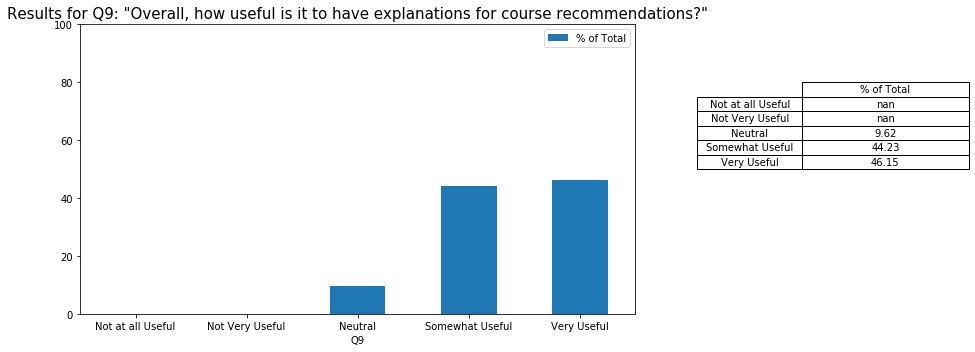

In [444]:
q_col_label = 'Q9'
q_name = questions[q_col_label]
print_aggregate_results(q_name, q_col_label, label_pos='top left')

As suspected explanations turned out to be quite helpful.  This agrees with the preponderance of published research which states that educational constraints and transparency are especially important in education where each decision is highly impactful in a student's academic career.  

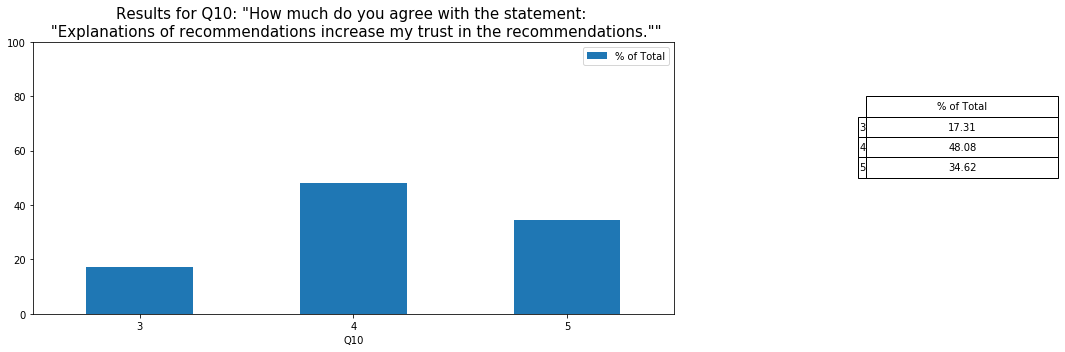

In [445]:
q_col_label = 'Q10'
q_name = questions[q_col_label]
print_aggregate_results(q_name, q_col_label, label_pos='top left')

>80% of students agreed that explanations increase trust.  In the future this should be broken out as a pre and post question because the quality of the explanations in this study probably affected these responses as well

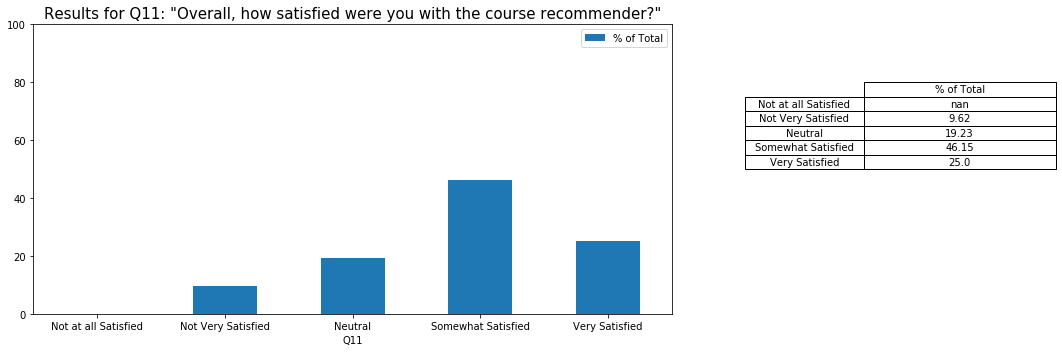

In [446]:
q_col_label = 'Q11'
q_name = questions[q_col_label]
print_aggregate_results(q_name, q_col_label, label_pos='top left')

Almost 3/4 were very satisified.  I think this is a decent start.  Especially as I consider this a pre-launch version.  Many issues with the interests selection being small, tags needing to be more accurate and explanations needing some work.

In [443]:
q_col_label = 'Q12'
q_name = questions[q_col_label]
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('\n' + q_name + ': \n')
for res in courserec_user_survey_DF[q_col_label].tolist():
    if isinstance(res, str): print(res)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Feel free to leave other feedback or suggestions for improvement.  Thank you!: 

I didn't really see how different it was to just using my own filtering. The Business vs other categories were nice though
Way to go back and change selection without needing to refresh would be nice. Similar to "If you're interested in more of a challenge try these classes..." section, maybe have a section that may have an interest in something you didn't click. (Like you liked computer science and humanities, but you may get a computer science and math section showing up there if it matches your other criteria)
the data of your system may be obtained by omscentral but the data is somewhat different for each person especially in terms of time spent and difficulty.
Very interesting idea!
Great job! Awesome idea. 
It didn't recommend any courses to me and I couldn't figure out what to click to go back to the 

Many great ideas were brought up by students of how to extend the application.  I would definitely investigate this further if continuing with the project.